In [132]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tot = pd.read_csv('NPS Total Visitors.csv')
#find change from previous year
i = tot.shape[0]-1
tot['Change'] = 0
while i > 0: 
   tot['Change'].iloc[i] = (tot['Visitor Count'].iloc[i] - 
                              tot['Visitor Count'][i-1])/tot['Visitor Count'].iloc[i-1]*100
   i = i-1


by_park = pd.read_csv('Annual Visitation By Park.csv', parse_dates= {"Date" : ["Year","Month"]})
by_park = by_park[['ParkName', 'UnitCode', 'ParkType', 'Region', 'State', 'Date', 'RecreationVisits']]
by_park['RecreationVisits'] = by_park['RecreationVisits'].replace(',','', regex=True)
by_park['RecreationVisits'] = by_park['RecreationVisits'].apply(pd.to_numeric)

#output to csv
cwd = os.getcwd()
path1 = cwd + "\Clean Data\AnnualVisits_1900-2022.csv"
path2 = cwd + "\Clean Data\MonthlyVisits_2000-2022.csv"
tot.to_csv(path1, index = False)
by_park.to_csv(path2, index=False)

C:\Users\Michael\AppData\Local\Temp\ipykernel_6340\3200751167.py:17: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  by_park = pd.read_csv('Annual Visitation By Park.csv', parse_dates= {"Date" : ["Year","Month"]})


In [5]:
tot.head()

,Year,Visitor Count,Change
0,1904,120690,0.000000
1,1905,140954,16.790123
2,1906,30569,-78.312783
3,1907,32935,7.739867
4,1908,42768,29.855777


In [6]:
tot.sort_values(['Change'], ascending=True)

,Year,Visitor Count,Change
2,1906,30569,-78.312783
38,1942,8891495,-56.600672
39,1943,6383513,-28.206528
116,2020,237064332,-27.617617
98,2002,227299880,-18.784903
...,...,...,...
32,1936,11749790,58.019484
15,1919,781178,79.078084
30,1934,6095201,87.217218
42,1946,20918012,92.694206


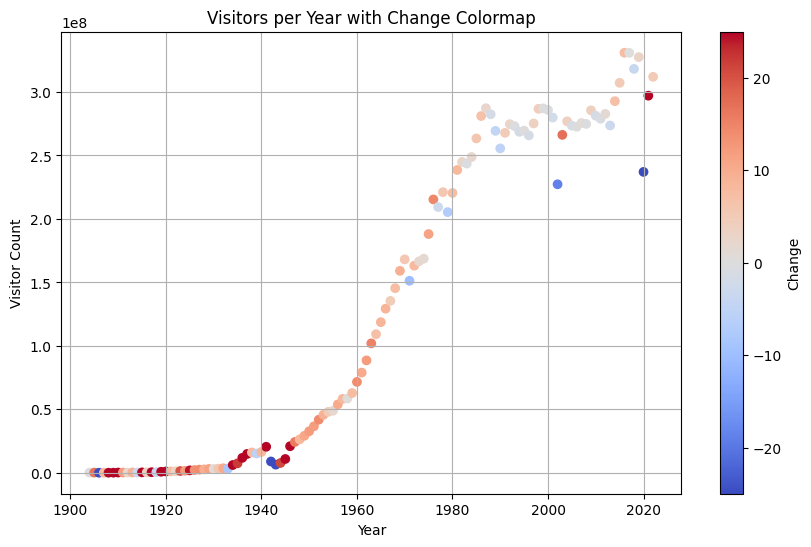

In [7]:
max_change = max(abs(min(tot['Change'])), abs(max(tot['Change'])))

plt.figure(figsize=(10, 6))
plt.scatter(tot['Year'], tot['Visitor Count'], c=tot['Change'], cmap = 'coolwarm',
            vmin=-25, vmax=25)
plt.colorbar(label='Change')
plt.title('Visitors per Year with Change Colormap')
plt.xlabel('Year')
plt.ylabel('Visitor Count')
plt.grid(True)
plt.show()

In [8]:
by_park.head()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits
0,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000,1,5722
1,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000,2,7108
2,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000,3,12726
3,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000,4,23698
4,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000,5,27027


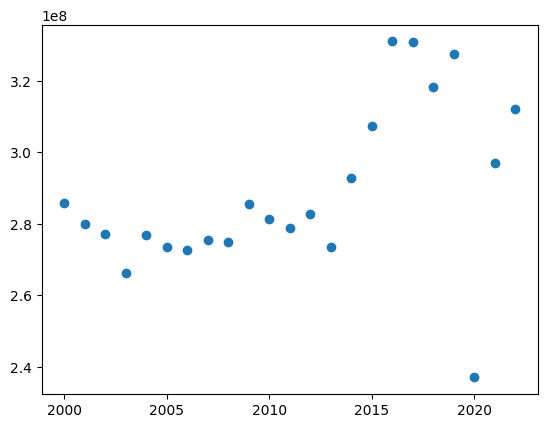

In [43]:
rec_visits_year = pd.pivot_table(by_park, values='RecreationVisits', index=['Year'], aggfunc = np.sum)
rec_visits_year = rec_visits_year.reset_index()

plt.scatter(rec_visits_year['Year'], rec_visits_year['RecreationVisits'])


In [128]:
#Create a plot to show the park visitors per month from 2018 5o 2022
df2 = pd.read_csv('Annual Visitation By Park.csv', parse_dates= {"date" : ["Year","Month"]})
df2.head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_6340\763077875.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('Annual Visitation By Park.csv', parse_dates= {"date" : ["Year","Month"]})


,date,ParkName,UnitCode,ParkType,Region,State,RecreationVisits,NonRecreationVisits,RecreationHours,NonRecreationHours,...,NonRecreationVisitsTotal,RecreationHoursTotal,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal
0,2000-01-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,"5,722",0,"5,722",0,...,0,"236,180",0,0,0,0,0,0,0,0
1,2000-02-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,"7,108",0,"7,108",0,...,0,"236,180",0,0,0,0,0,0,0,0
2,2000-03-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,"12,726",0,"12,726",0,...,0,"236,180",0,0,0,0,0,0,0,0
3,2000-04-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,"23,698",0,"23,698",0,...,0,"236,180",0,0,0,0,0,0,0,0
4,2000-05-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,"27,027",0,"27,027",0,...,0,"236,180",0,0,0,0,0,0,0,0


In [ ]:
parktype_visits = pd.pivot_table(by_park, values='RecreationVisits', index=['ParkType'], aggfunc = np.sum)
parktype_visits = parktype_visits.sort_values(['RecreationVisits'], ascending=False).reset_index()
parktype_visits

# Plot the bar chart
ax = parktype_visits.plot(kind='bar', stacked=True)

# Set the x-axis tick labels to parktype
ax.set_xticklabels(parktype_visits.ParkType, rotation=90)

# Set the plot title and axis labels
plt.title('Visitor Count by Park Type')
plt.xlabel('Park Type')
plt.ylabel('Visitor Count')

# Display the bar chart
plt.show()


In [106]:
#select top park types 
top_types = []
i = 0
while i < 7: 
    top_types.append(parktype_visits['ParkType'][i])
    i=i+1

top_types_data = by_park.query('ParkType in @top_types')
top_types_data_2015 = top_types_data.query('Year in [2018, 2019, 2020, 2021, 2022]')
top_types_pivot = pd.pivot_table(top_types_data_2015, values='RecreationVisits', index='Year', columns='ParkType', aggfunc='sum')
top_types_pivot



ParkType,National Historical Park,National Memorial,National Monument,National Park,National Parkway,National Recreation Area,National Seashore
Year,,,,,,,
2018,33340856,38111959,21509596,87714135,29846041,51022484,18325744
2019,34904676,37653264,22344611,91010784,30186057,52110142,20273975
2020,20312921,15569260,9043977,67931703,27835471,48219772,18034969
2021,23742379,29483249,13786614,92251857,30774635,50366960,21776435
2022,26205985,39759274,19085277,88662181,30742853,50219269,20846510


<Figure size 2000x1200 with 0 Axes>

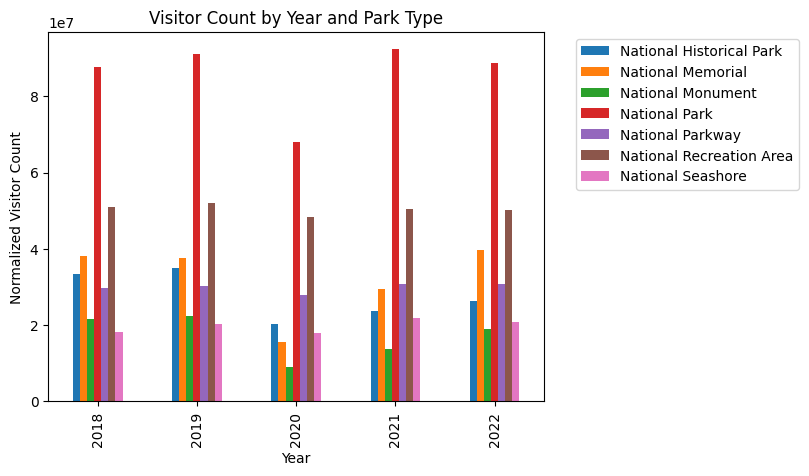

In [112]:
plt.figure(figsize=(20, 12))

ax = top_types_pivot.plot.bar()

plt.title('Visitor Count by Year and Park Type')
plt.xlabel('Year')
plt.ylabel('Normalized Visitor Count')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()
